In [2]:
import numpy as np
import pandas as pd
import os
import sklearn.linear_model
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
import sklearn.ensemble
import matplotlib
import matplotlib.pyplot as plt
data_dir = 'data_reviews'
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

N, n_cols = x_train_df.shape
print("Shape of x_train_df: (%d, %d)" % (N,n_cols))
print("Shape of y_train_df: %s" % str(y_train_df.shape))

# Print out the first five rows and last five rows
tr_text_list = x_train_df['text'].values.tolist()
rows = np.arange(0, 5)
for row_id in rows:
    text = tr_text_list[row_id]
    print("row %5d | y = %d | %s" % (row_id, y_train_df.values[row_id], text))

print("...")
rows = np.arange(N - 5, N)
for row_id in rows:
    text = tr_text_list[row_id]
    print("row %5d | y = %d | %s" % (row_id, y_train_df.values[row_id], text))

Shape of x_train_df: (2400, 2)
Shape of y_train_df: (2400, 1)
row     0 | y = 0 | Oh and I forgot to also mention the weird color effect it has on your phone.
row     1 | y = 0 | THAT one didn't work either.
row     2 | y = 0 | Waste of 13 bucks.
row     3 | y = 0 | Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.
row     4 | y = 0 | None of the three sizes they sent with the headset would stay in my ears.
...
row  2395 | y = 1 | The sweet potato fries were very good and seasoned well.
row  2396 | y = 1 | I could eat their bruschetta all day it is devine.
row  2397 | y = 1 | Ambience is perfect.
row  2398 | y = 1 | We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.
row  2399 | y = 1 | Service was good and the company was better!


0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2395      yelp
2396      yelp
2397      yelp
2398      yelp
2399      yelp
Name: website_name, Length: 2400, dtype: object

In [315]:
kf = KFold(n_splits=3, shuffle=True)

In [ ]:
BOW_vectorizer = CountVectorizer(max_features = 1000,stop_words = 'english',ngram_range = (1,2),lowercase = True)
BOW_vectorizer.fit_transform(tr_text_list)
BOW_vectorizer.get_feature_names()
BOW_vectorizer.transform(tr_text_list).toarray()

# Logistic

In [582]:
logistic = sklearn.linear_model.LogisticRegression(C=1000, max_iter=100,penalty='l1',solver='saga')
logistic_hyperparameter_grid_by_name = dict(
    C = [0.1, 1, 10, 100, 1000],
    max_iter = [40,80],
    )
logistic_search = sklearn.model_selection.GridSearchCV(
    logistic,
    logistic_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
BOW_vectorizer = TfidfVectorizer(max_features = 8000, ngram_range = (1,3), lowercase = True)
# BOW_vectorizer = TfidfVectorizer(max_features = 500, stop_words = 'english', ngram_range = (1,2), lowercase = True)
BOW_vectorizer.fit_transform(tr_text_list)

Train_list = BOW_vectorizer.transform(x_train_df['text'].values.tolist()).toarray()
logistic_search.fit(Train_list, y_train_df.values.reshape(-1,))
logistic_search_results_df = pd.DataFrame(logistic_search.cv_results_).copy()

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/li

In [583]:
print(logistic_search.best_params_)
print(logistic_search.best_score_)

{'C': 100, 'max_iter': 80}
0.8179903200713644


In [586]:
Temp = logistic_search_results_df[logistic_search_results_df.param_max_iter == 80 ]
Temp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,4.1984,0.2952,0.0123,0.0023,0.1,80,"{'C': 0.1, 'max_iter': 80}",0.5000,0.5578,0.5558,0.5379,0.0268,9,0.5000,0.5605,0.5577,0.5394,0.0279
3,11.1472,2.2349,0.0127,0.0013,1,80,"{'C': 1, 'max_iter': 80}",0.7313,0.7335,0.7349,0.7332,0.0015,7,0.7804,0.7832,0.7773,0.7803,0.0024
5,20.7142,2.3328,0.0150,0.0046,10,80,"{'C': 10, 'max_iter': 80}",0.8145,0.8103,0.8128,0.8125,0.0017,5,1.0000,1.0000,1.0000,1.0000,0.0000
7,22.7632,0.3873,0.0122,0.0020,100,80,"{'C': 100, 'max_iter': 80}",0.8205,0.8127,0.8208,0.8180,0.0037,1,1.0000,1.0000,1.0000,1.0000,0.0000
9,20.4323,1.2789,0.0103,0.0005,1000,80,"{'C': 1000, 'max_iter': 80}",0.8199,0.8127,0.8115,0.8147,0.0037,2,1.0000,1.0000,1.0000,1.0000,0.0000


In [587]:
Temp['mean_test_score']

1    0.5379
3    0.7332
5    0.8125
7    0.8180
9    0.8147
Name: mean_test_score, dtype: float64

(0.0, 1.0)

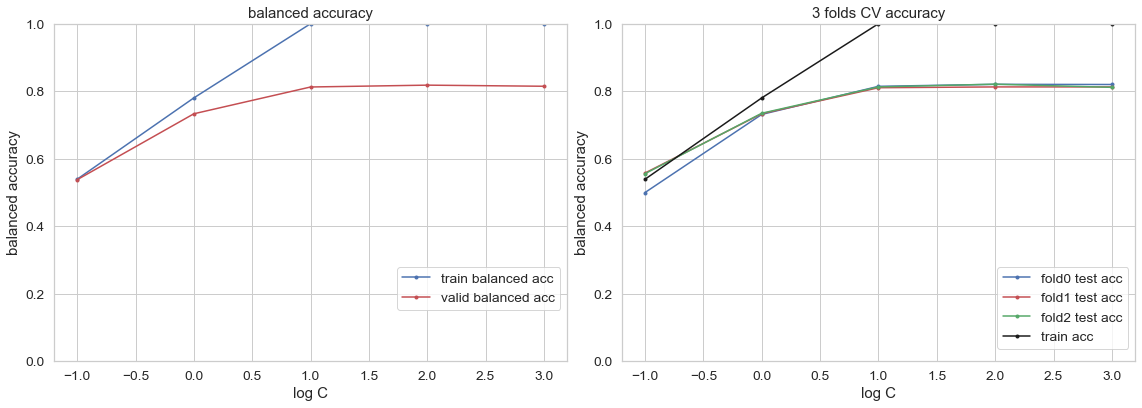

In [588]:

fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('balanced accuracy')
plt.plot([-1,0,1,2,3], Temp['mean_train_score'], 'b.-', label='train balanced acc')
plt.plot([-1,0,1,2,3], Temp['mean_test_score'], 'r.-', label='valid balanced acc')
plt.ylabel('balanced accuracy')
plt.xlabel("log C")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('3 folds CV accuracy')
plt.plot([-1,0,1,2,3], Temp['split0_test_score'], 'b.-', label='fold0 test acc')
plt.plot([-1,0,1,2,3], Temp['split1_test_score'], 'r.-', label='fold1 test acc')
plt.plot([-1,0,1,2,3], Temp['split2_test_score'], 'g.-', label='fold2 test acc')
plt.plot([-1,0,1,2,3], Temp['mean_train_score'], 'k.-', label='train acc')
plt.ylabel('balanced accuracy')
plt.xlabel("log C")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

In [584]:
BOW_vectorizer = TfidfVectorizer(max_features = 8000, ngram_range = (1,3), lowercase = True)
BOW_vectorizer.fit_transform(tr_text_list)
BOW_vectorizer.get_feature_names()
Train_list = BOW_vectorizer.transform(tr_text_list).toarray()
logistic = sklearn.linear_model.LogisticRegression(C=100, max_iter=80,penalty='l1',solver='saga')
logistic.fit(Train_list, y_train_df.values.reshape(-1,))

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=100, max_iter=80, penalty='l1', solver='saga')

In [618]:
x_test_df = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))
Test_list = BOW_vectorizer.transform(x_test_df['text'].values.tolist()).toarray()
yproba_te = logistic.predict(Test_list)
np.savetxt('yproba1_test.txt', yproba_te, delimiter='\n')
yproba_te

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [552]:
false_positive

[17,
 193,
 315,
 320,
 804,
 890,
 949,
 1000,
 1033,
 1066,
 1102,
 1105,
 1154,
 1636,
 1666,
 1690,
 1739,
 1793,
 1892]

In [614]:
ypred = forest.predict(Train_list)
false_positive = []
false_negative = []
for i in range(2400):
    p = ypred[i]
    if p == 1 and p != y_train_df.values.reshape(-1,)[i]:
        false_positive.append(i)
    if p == 0 and p != y_train_df.values.reshape(-1,)[i]:
        false_negative.append(i)

In [615]:
for x in false_negative:
    print(x_train_df['website_name'][x],X[x])


amazon ['Five star Plus, plus.']
amazon ['WORTHWHILE.']
amazon ['Magical Help.']
amazon ['Now I know that I made a wise decision.']
amazon ['I did not have any problem with this item and would order it again if needed.']
imdb ['Predictable, but not a bad watch.  ']
imdb ['I struggle to find anything bad to say about it.  ']
imdb ['How can anyone in their right mind ask for anything more from a movie than this?  ']
imdb ['Great movie!  ']
imdb ['The last 15 minutes of movie are also not bad as well.  ']
imdb ['Waste your money on this game.  ']
imdb ['Not much dialogue, not much music, the whole film was shot as elaborately and aesthetically like a sculpture.  ']
imdb ['You wont regret it!  ']
imdb ['Anne Heche was utterly convincing.  ']
yelp ['No complaints!']
yelp ['It was just not a fun experience.']
yelp ['I was seated immediately.']


In [616]:
for x in false_positive:
    print(x_train_df['website_name'][x],X[x])

amazon ["Unreliable - I'm giving up."]
amazon ["Couldn't figure it out"]
amazon ['Phone falls out easily.']
amazon ["I wouldn't recommend buying this product."]
imdb ['Highly unrecommended.  ']
imdb ['The basic premise is wasted since it is sidelined by the inexplicable focus on the documentary crew.  ']
imdb ['The death row scenes were entirely unmoving.  ']
imdb ['And the accents are absolutely abysmal!  ']
imdb ['It was so BORING!  ']
imdb ['This scene is very strong and unpleasant.  ']
imdb ['The results, well, are a shame.  ']
yelp ['The kids play area is NASTY!']
yelp ['It was attached to a gas station, and that is rarely a good sign.']
yelp ["I'm super pissd."]


In [617]:
X = np.array(tr_text_list).reshape(-1,1)

In [613]:
BOW_vectorizer = TfidfVectorizer(max_features = 8000, ngram_range = (1,3), lowercase = True)
BOW_vectorizer.fit_transform(tr_text_list)
BOW_vectorizer.get_feature_names()
Train_list = BOW_vectorizer.transform(tr_text_list).toarray()
forest = sklearn.ensemble.RandomForestClassifier(
    max_features = 10,
    max_depth = 50,
    n_estimators=125,
    criterion='gini',
    min_samples_split=2,
    min_samples_leaf=1)

forest.fit(Train_list, y_train_df.values.reshape(-1,))

RandomForestClassifier(max_depth=50, max_features=10, n_estimators=125)

# Forest

In [594]:
forest = sklearn.ensemble.RandomForestClassifier(
    n_estimators=125,
    criterion='gini',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1)

forest_hyperparameter_grid_by_name = dict(
    max_features=[10],
    max_depth=[50,100,150,200],
    min_samples_leaf=[1],
    n_estimators=[125],
    random_state=[101],
    )
forest_searcher = sklearn.model_selection.GridSearchCV(
    forest,
    forest_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
#     BOW_vectorizer = TfidfVectorizer(max_features = mf, stop_words = 'english', ngram_range = (1,2), lowercase = True)
# BOW_vectorizer = CountVectorizer(max_features = 9000, stop_words = 'english', ngram_range = (1,2), lowercase = True)
BOW_vectorizer = TfidfVectorizer(max_features = 6000, ngram_range = (1,3), lowercase = True)
BOW_vectorizer.fit_transform(x_train_df['text'].values.tolist())
BOW_vectorizer.get_feature_names()
Train_list = BOW_vectorizer.transform(x_train_df['text'].values.tolist()).toarray()
forest_searcher.fit(Train_list, y_train_df.values.reshape(-1,))
forest_search_results_df = pd.DataFrame(forest_searcher.cv_results_).copy()
print(forest_searcher.best_params_)
print(forest_searcher.best_score_)

{'max_depth': 200, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 125, 'random_state': 101}
0.7798501114156865


In [595]:
print(forest_searcher.best_params_)
print(forest_searcher.best_score_)

{'max_depth': 200, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 125, 'random_state': 101}
0.7798501114156865


In [519]:
pd.set_option('precision', 4)
forest_keys = ['param_max_depth','param_max_features']
forest_search_results_df.sort_values(forest_keys, inplace=True)
forest_search_results_df[forest_keys + ['mean_train_score', 'mean_test_score', 'rank_test_score', 'mean_fit_time']]

,param_max_depth,param_max_features,mean_train_score,mean_test_score,rank_test_score,mean_fit_time
0,50,10,0.9622,0.7647,4,2.2205
1,100,10,0.9798,0.7747,2,2.9415
2,150,10,0.9833,0.7726,3,5.0590
3,200,10,0.9856,0.7780,1,5.8960


In [370]:
import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

In [520]:
Temp = forest_search_results_df[forest_search_results_df.param_max_features == 10 ]
Temp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,param_random_state,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.2205,0.0979,0.1550,0.0189,50,10,1,125,101,"{'max_depth': 50, 'max_features': 10, 'min_sam...",...,0.7566,0.7662,0.7647,0.0061,4,0.9675,0.9516,0.9674,0.9622,0.0075
1,2.9415,0.0410,0.1660,0.0082,100,10,1,125,101,"{'max_depth': 100, 'max_features': 10, 'min_sa...",...,0.7764,0.7637,0.7747,0.0083,2,0.9800,0.9761,0.9832,0.9798,0.0029
2,5.0590,1.1225,0.2623,0.0332,150,10,1,125,101,"{'max_depth': 150, 'max_features': 10, 'min_sa...",...,0.7786,0.7689,0.7726,0.0043,3,0.9837,0.9799,0.9863,0.9833,0.0026
3,5.8960,0.5776,0.3937,0.0661,200,10,1,125,101,"{'max_depth': 200, 'max_features': 10, 'min_sa...",...,0.7862,0.7764,0.7780,0.0061,1,0.9837,0.9830,0.9900,0.9856,0.0031


(0.0, 1.0)

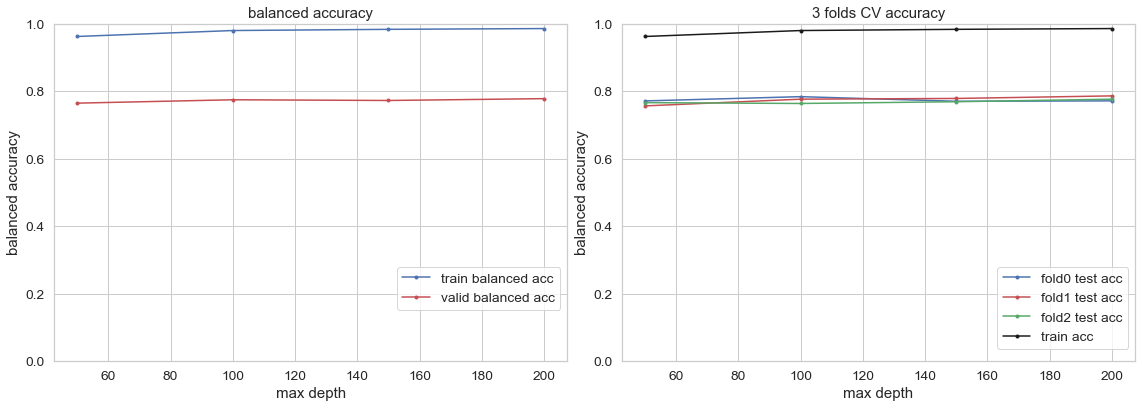

In [521]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('balanced accuracy')
plt.plot(Temp['param_max_depth'], Temp['mean_train_score'], 'b.-', label='train balanced acc')
plt.plot(Temp['param_max_depth'], Temp['mean_test_score'], 'r.-', label='valid balanced acc')
plt.ylabel('balanced accuracy')
plt.xlabel("max depth")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('3 folds CV accuracy')
plt.plot(Temp['param_max_depth'], Temp['split0_test_score'], 'b.-', label='fold0 test acc')
plt.plot(Temp['param_max_depth'], Temp['split1_test_score'], 'r.-', label='fold1 test acc')
plt.plot(Temp['param_max_depth'], Temp['split2_test_score'], 'g.-', label='fold2 test acc')
plt.plot(Temp['param_max_depth'], Temp['mean_train_score'], 'k.-', label='train acc')
plt.ylabel('balanced accuracy')
plt.xlabel("max depth")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

# MLP

In [600]:
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier(
        hidden_layer_sizes=[4,2],
        activation='relu',
        alpha=0.0001,
        tol=1e-5,
        n_iter_no_change=50,
        max_iter=1000,
        solver='sgd',
        batch_size=500,
        learning_rate='adaptive', learning_rate_init=0.2, momentum=0.0,
        )

mpl_hyperparameter_grid_by_name = dict(
    batch_size = [20,50,100],
    learning_rate_init = [0.3,0.5,1]
    )
mpl_searcher = sklearn.model_selection.GridSearchCV(
    mpl,
    mpl_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
# BOW_vectorizer = TfidfVectorizer(max_features = 500, stop_words = 'english', ngram_range = (1,2), lowercase = True)
BOW_vectorizer = TfidfVectorizer(max_features = 6000, ngram_range = (1,3), lowercase = True)
# BOW_vectorizer = CountVectorizer(max_features = 500, stop_words = 'english', ngram_range = (1,2), lowercase = True)
BOW_vectorizer.fit_transform(x_train_df['text'].values.tolist())
BOW_vectorizer.get_feature_names()
Train_list = BOW_vectorizer.transform(x_train_df['text'].values.tolist()).toarray()
mpl_searcher.fit(Train_list, y_train_df.values.reshape(-1,))
mpl_search_results_df = pd.DataFrame(mpl_searcher.cv_results_).copy()

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupte

In [601]:
mpl_search_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,82.3900,12.1349,0.0719,0.0184,20,0.3,"{'batch_size': 20, 'learning_rate_init': 0.3}",0.8101,0.5000,0.5000,0.6034,0.1462,1,1.0000,0.500,0.5,0.6667,0.2357
1,85.9437,0.9569,0.0126,0.0014,20,0.5,"{'batch_size': 20, 'learning_rate_init': 0.5}",0.5000,0.5000,0.5012,0.5004,0.0006,5,0.5006,0.500,0.5,0.5002,0.0003
2,37.9209,51.2763,0.0244,0.0102,20,1,"{'batch_size': 20, 'learning_rate_init': 1}",0.7745,0.5000,0.5000,0.5915,0.1294,2,0.9945,0.500,0.5,0.6648,0.2331
3,0.5495,0.0180,0.0169,0.0003,50,0.3,"{'batch_size': 50, 'learning_rate_init': 0.3}",0.5000,0.5026,0.5000,0.5009,0.0012,4,0.5013,0.511,0.5,0.5041,0.0049
4,0.3869,0.2072,0.0168,0.0025,50,0.5,"{'batch_size': 50, 'learning_rate_init': 0.5}",0.5000,0.5000,0.5000,0.5000,0.0000,6,0.5000,0.500,0.5,0.5000,0.0000
5,0.5765,0.6467,0.0204,0.0018,50,1,"{'batch_size': 50, 'learning_rate_init': 1}",0.5000,0.5000,0.5000,0.5000,0.0000,6,0.5000,0.500,0.5,0.5000,0.0000
6,0.6174,0.4844,0.0185,0.0024,100,0.3,"{'batch_size': 100, 'learning_rate_init': 0.3}",0.5000,0.5000,0.5000,0.5000,0.0000,6,0.5000,0.500,0.5,0.5000,0.0000
7,0.7432,0.6790,0.0174,0.0005,100,0.5,"{'batch_size': 100, 'learning_rate_init': 0.5}",0.6711,0.5000,0.5000,0.5570,0.0807,3,0.7448,0.500,0.5,0.5816,0.1154
8,0.1781,0.1066,0.0173,0.0021,100,1,"{'batch_size': 100, 'learning_rate_init': 1}",0.5000,0.5000,0.5000,0.5000,0.0000,6,0.5000,0.500,0.5,0.5000,0.0000


In [598]:
print(mpl_searcher.best_params_)
print(mpl_searcher.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [599]:
stop = ['and', 'for', 'in', 'is', 'it', 'of', 'the', 'this', 'to', 'was']